Welcome to the jupyter notebook! To run any cell, press `Shift+Enter` or `Ctrl+Enter`.

**IMPORTANT** : Please have a look at `Help->User Interface Tour` and `Help->Keyboard Shortcuts` in the toolbar above that will help you get started.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Notebook Basics

A cell contains any type of python inputs (expression, function definitions, etc...). Running a cell is equivalent to input this block in the python interpreter. The notebook will print the output of the last executed line.

In [2]:
1

1

In [3]:
x = [2,3,4]

def my_function(l):
    l.append(12)

In [4]:
my_function(x)

x

[2, 3, 4, 12]

Text(0, 0.5, 'Y label')

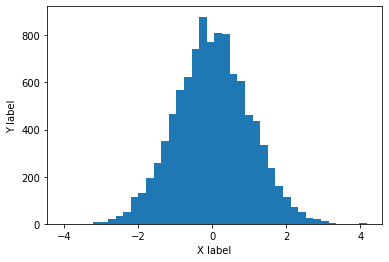

In [5]:
# Matplotlib is used for plotting, plots are directly embedded in the
# notebook thanks to the '%matplolib inline' command at the beginning
plt.hist(np.random.randn(10000), bins=40)
plt.xlabel('X label')
plt.ylabel('Y label')

Numpy Basics
============

**IMPORTANT** : the numpy documentation is quite good. The Notebook system is really good to help you. Use the Auto-Completion with `Tab`, and use `Shift+Tab` to get the complete documentation about the current function (when the cursor is between the parenthesis of the function for instance).

For example, you want to multiply two arrays. `np.mul` + `Tab` complete to the only valid function `np.multiply`. Then using `Shift+Tab` you learn `np.multiply` is actually the element-wise multiplication and is equivalent to the `*` operator.

In [7]:
np.multiply()

ValueError: invalid number of arguments

### Creation of arrays

Creating ndarrays (`np.zeros`, `np.ones`) is done by giving the shape as an iterable (List or Tuple). An integer is also accepted for one-dimensional array.

`np.eye` creates an identity matrix.

You can also create an array by giving iterables to it.

(NB : The random functions `np.random.rand` and `np.random.randn` are exceptions though)

In [8]:
np.zeros(4)

array([0., 0., 0., 0.])

In [9]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
np.array([[1,3,4],[2,5,6]])

array([[1, 3, 4],
       [2, 5, 6]])

In [11]:
np.arange(10)  # NB : np.array(range(10)) is a slightly more complicated equivalent

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.random.randn(3, 4) # normal distributed values

array([[-0.29824526, -0.22240881, -0.50108624,  0.27162989],
       [ 0.91316793, -0.60842073,  1.16563534, -1.39516705],
       [-0.08096632,  0.43429573, -0.75077703,  0.77966284]])

In [13]:
# 3-D tensor
tensor_3 = np.ones((3, 4, 2))
tensor_3

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]])

### ndarray basics

A ndarray python object is just a reference to the data location and its characteristics.

All numpy operations applying on an array can be called np._function_(a) or a._function_() (i.e `np.sum(a)` or `a.sum()`)

It has an attribute `shape` that returns a tuple of the different dimensions of the ndarray. It also has an attribute `dtype` that describes the type of data of the object (default type is `float64`)

**WARNING** because of the object structure, unless you call `copy()` copying the reference is not copying the data.

In [13]:
tensor_3.shape, tensor_3.dtype

((2, 4, 2), dtype('float64'))

In [15]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = np.array([[4, 3.0], [2, 1]])
(b.dtype, a.dtype) # each array has a data type (casting rules apply for int -> float)

(dtype('float64'), dtype('float64'))

In [16]:
np.array(["Mickey", "Mouse"]) # can hold more than just numbers

array(['Mickey', 'Mouse'], dtype='<U6')

In [21]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = a  # Copying the reference only
b[0,0] = 34
a


array([[34.,  2.],
       [ 5.,  4.]])

In [22]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = a.copy()  # Deep-copy of the data
b[0,0] = 3
a

array([[1., 2.],
       [5., 4.]])

#### Basic operators are working element-wise (+, -, *, /)

When trying to apply operators for arrays with different sizes, they are very specific rules that you might want to understand in the future : http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [40]:
np.ones((2, 4))/np.array([1., 3., 1., 5.])

array([[1.        , 0.33333333, 1.        , 0.2       ],
       [1.        , 0.33333333, 1.        , 0.2       ]])

In [41]:
np.eye(3) - np.ones((3,3))

array([[ 0., -1., -1.],
       [-1.,  0., -1.],
       [-1., -1.,  0.]])

In [42]:
print(a)
print(a.shape)  # Get shape
print(a.shape[0])  # Get size of first dimension

[[1. 2.]
 [5. 4.]]
(2, 2)
2


#### Accessing elements and slicing

For people uncomfortable with the slicing of arrays, please have a look at the 'Indexing and Slicing' section of http://www.python-course.eu/numpy.php

In [44]:
print(a[0])  # Get first line (slice for the first dimension)
print(a[:, 1])  # Get second column (slice for the second dimension)
print(a)  # Get first line second column element

[1. 2.]
[2. 4.]
[[1. 2.]
 [5. 4.]]


#### Changing the shape of arrays

`ravel` creates a flattened view of an array (1-D representation) whereas `flatten` creates flattened copy of the array.

`reshape` allows in-place modification of the shape of the data. `transpose` shuffles the dimensions.

`np.newaxis` allows the creation of empty dimensions.

In [45]:

a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = np.array([[4, 3], [2, 1]])
v = np.array([0.5, 2.0])



In [56]:
print(a)
print(a.T)  # Equivalent : a.tranpose(), np.transpose(a)
print(a.ravel())
print(a.flatten())
b = a.ravel()
b[1] = 34
print(b)


[[ 1. 34.]
 [ 5.  4.]]
[[ 1.  5.]
 [34.  4.]]
[ 1. 34.  5.  4.]
[ 1. 34.  5.  4.]
[ 1. 34.  5.  4.]


In [58]:
c = np.random.randn(4,5)
print(c.shape)
print(c[np.newaxis].shape)  # Adding a dimension
print("cNewDim",c)
print(c.T.shape)  
print(c.reshape([10,2]).shape)
print(c.reshape([10,2]))

(4, 5)
(1, 4, 5)
cNewDim [[ 0.6887199  -1.37750157 -0.08056505  0.5071882   1.76185783]
 [ 0.31885196  1.1192156  -0.48201229 -0.85693422 -0.83629578]
 [-0.45198589  0.55244496  0.99772033 -1.13926676  0.99149926]
 [ 0.06746815  0.92677637 -0.2705036  -0.96191771 -1.0202092 ]]
(5, 4)
(10, 2)
[[ 0.6887199  -1.37750157]
 [-0.08056505  0.5071882 ]
 [ 1.76185783  0.31885196]
 [ 1.1192156  -0.48201229]
 [-0.85693422 -0.83629578]
 [-0.45198589  0.55244496]
 [ 0.99772033 -1.13926676]
 [ 0.99149926  0.06746815]
 [ 0.92677637 -0.2705036 ]
 [-0.96191771 -1.0202092 ]]


In [25]:
a.reshape((-1, 1)) # a[-1] means 'whatever needs to go there'


array([[ 1.],
       [ 2.],
       [ 5.],
       [ 4.]])

#### Reduction operations

Reduction operations (`np.sum`, `np.max`, `np.min`, `np.std`) work on the flattened ndarray by default. You can specify the reduction axis as an argument

In [59]:
print(a)
np.sum(a), np.sum(a, axis=0), np.sum(a, axis=1) # reduce-operations reduce the whole array if no axis is specified

[[ 1. 34.]
 [ 5.  4.]]


(44.0, array([ 6., 38.]), array([35.,  9.]))

#### Linear-algebra operations

In [27]:
np.dot(a, b) # matrix multiplication

array([[  8.,   5.],
       [ 28.,  19.]])

In [28]:
# Other ways of writing matrix multiplication, the '@' operator for matrix multiplication
# was introduced in Python 3.5
np.allclose(a.dot(b), a @ b)

True

In [29]:
# For other linear algebra operations, use the np.linalg module
np.linalg.eig(a)  # Eigen-decomposition

(array([-1.,  6.]), array([[-0.70710678, -0.37139068],
        [ 0.70710678, -0.92847669]]))

In [60]:
print(np.linalg.inv(a))  # Inverse
np.allclose(np.linalg.inv(a) @ a, np.identity(a.shape[1]))  # a^-1 * a = Id

[[-0.02409639  0.20481928]
 [ 0.03012048 -0.0060241 ]]


True

In [61]:
np.linalg.solve(a, v) # solves ax = v

array([0.39759036, 0.00301205])

#### Grouping operations

Grouping operations (`np.stack`, `np.hstack`, `np.vstack`, `np.concatenate`) take an iterable of ndarrays and not ndarrays as separate arguments : np.concatenate([a,b]) and not np.concatenate(a,b).

In [75]:
print(a,b)
b = (a.copy()).reshape(2,2)
print(b)
b[:,1]= 88
print(b)
np.hstack([a, b])

[[45. 94.]
 [ 5. 94.]] [[45. 88.]
 [ 5. 88.]]
[[45. 94.]
 [ 5. 94.]]
[[45. 88.]
 [ 5. 88.]]


array([[45., 94., 45., 88.],
       [ 5., 94.,  5., 88.]])

In [76]:
np.vstack([a, b])

array([[45., 94.],
       [ 5., 94.],
       [45., 88.],
       [ 5., 88.]])

In [78]:
print(v)
np.vstack([a, b]) + v # broadcasting

[0.5 2. ]


array([[45.5, 96. ],
       [ 5.5, 96. ],
       [45.5, 90. ],
       [ 5.5, 90. ]])

In [79]:
np.hstack([a, b]) + v # does not work

ValueError: operands could not be broadcast together with shapes (2,4) (2,) 

In [80]:
np.hstack([a, b]) + v.T # transposing a 1-D array achieves nothing

ValueError: operands could not be broadcast together with shapes (2,4) (2,) 

In [82]:
print(v, "ss", v.reshape((-1, 1)))
np.hstack([a, b]) + v.reshape((-1, 1)) # reshaping to convert v from a (2,) vector to a (2,1) matrix

[0.5 2. ] ss [[0.5]
 [2. ]]


array([[45.5, 94.5, 45.5, 88.5],
       [ 7. , 96. ,  7. , 90. ]])

In [38]:
np.hstack([a, b]) + v[:, np.newaxis] # equivalently, we can add an axis

array([[ 1.5,  2.5,  4.5,  3.5],
       [ 7. ,  6. ,  4. ,  3. ]])

## Working on subset of the elements

We have two ways in order to apply operations on subparts of arrays (besides slicing).

#### Slicing reminders

In [83]:
r = np.random.random_integers(0, 9, size=(3, 4))

/Users/jerome/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead
  """Entry point for launching an IPython kernel.


In [84]:
r

array([[0, 5, 0, 7],
       [4, 2, 1, 4],
       [6, 0, 5, 2]])

In [85]:
r[0], r[1]

(array([0, 5, 0, 7]), array([4, 2, 1, 4]))

In [87]:
r[0:2]

array([[0, 5, 0, 7],
       [4, 2, 1, 4]])

In [89]:
r[1][2] # regular python

1

In [90]:
r[1, 2] # numpy

1

In [92]:
r[1:3, 1:3]

array([[2, 1],
       [0, 5]])

#### Binary masks

Using logical operations on arrays give a binary mask. Using a binary mask as indexing acts as a filter and outputs just the very elements where the value is True. This gives a memoryview of the array that can get modified.

In [93]:
r > 5  # Binary element-wise result

array([[False, False, False,  True],
       [False, False, False, False],
       [ True, False, False, False]])

In [94]:
r[r > 5]  # Use the binary mask as filter

array([7, 6])

In [97]:
r[r > 5] = 999  # Modify the corresponding values with a constant

In [98]:
r

array([[  0,   5,   0, 999],
       [  4,   2,   1,   4],
       [999,   0,   5,   2]])

#### Working with indices

The second way to work on subpart of arrays are through indices. Usually you'd use one array per dimension with matching indices.

**WARNING** : indices are usually slower than binary masks because it is harder to be parallelized by the underlying BLAS library.

In [100]:
# Get the indices where the condition is true, gives a tuple whose length
# is the number of dimensions of the input array
res = np.where(r == 999)
res[0]

array([0, 2])

In [101]:
print(np.where(np.arange(10) < 5))  # Is a 1-tuple
np.where(np.arange(10) < 5)[0]  # Accessing the first element gives the indices array

(array([0, 1, 2, 3, 4]),)


array([0, 1, 2, 3, 4])

In [103]:
np.where(r == 999, -10, r+1000)  # Ternary condition, if True take element from first array, otherwise from second

array([[1000, 1005, 1000,  -10],
       [1004, 1002, 1001, 1004],
       [ -10, 1000, 1005, 1002]])

In [113]:
print(r)
print(r[(np.array([1,2]), np.array([2,2]))] ) # Gets the view corresponding to the indices. 
print(r[(1,2)])
print(np.array([1,2]))
print(r[[1,2], [2,2]])
#NB : iterable of arrays as indexing

[[  0   5   0 999]
 [  4   2   1   4]
 [999   0   5   2]]
[1 5]
1
[1 2]
[1 5]


# Working with arrays, examples

Thanks to all these tools, you should be able to avoid writing almost any for-loops which are extremely costly in Python (even more than in Matlab, because good JIT engines are yet to come). In case you **really** need for-loops for array computation (usually not needed but it happens) have a look at http://numba.pydata.org/ (_For advanced users_)

#### Counting the number of positive elements that satisfy a condition

In [114]:
numbers = np.random.randn(1000, 1000)

In [115]:
%%timeit  # Naive version
my_sum = 0
for n in numbers.ravel():
    if n>0:
        my_sum += 1

344 ms ± 7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [116]:
%timeit np.sum(numbers > 0)

1.8 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Compute polynomial for a lot of values

In [117]:
X = np.random.randn(10000)

In [118]:
%%timeit  # Naive version
my_result = np.zeros(len(X))
for i, x in enumerate(X.ravel()):
    my_result[i] = 1 + x + x**2 + x**3 + x**4

15.8 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
%timeit 1 + X + X**2 + X**3 + X**4

1000 loops, best of 3: 759 µs per loop


## SciPy

SciPy is a collection of libraries more specialized than Numpy. It is the equivalent of toolboxes in Matlab.

Have a look at their collection: http://docs.scipy.org/doc/scipy/reference/

Many traditionnal functions are coded there.

In [119]:
X = np.random.randn(1000)

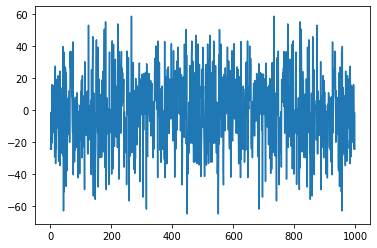

In [120]:
from scipy.fftpack import fft
plt.plot(fft(X).real)